In [14]:
'''the  task is i need to give score to startup based on their features in the csv 
file for handling csv file and calculation i need pandas and numpy''' 

'the  task is i need to give score to startup based on their features in the csv \nfile for handling csv file and calculation i need pandas and numpy'

In [15]:
#import packages
import pandas as pd
import numpy as np

In [16]:
''' after that i need to analyse the dataset and normalise.there is two pat for normalisation the 
some attributes are higher better and some are lower better, for that i separated them,only spending is high it is not better
other are higher better'''

' after that i need to analyse the dataset and normalise.there is two pat for normalisation the \nsome attributes are higher better and some are lower better, for that i separated them,only spending is high it is not better\nother are higher better'

In [17]:
#Load the dataset and preview
df = pd.read_csv('Startup_Scoring_Dataset.csv')
display(df.head())

#separating based on higherr and lower
better_high = [
    'team_experience',       
    'market_size_million_usd',
    'monthly_active_users',  
    'funds_raised_inr',      
    'valuation_inr',         
]
worse_high = [
    'monthly_burn_rate_inr', 
]

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222


In [18]:
''' for min max normalisation i used min max normalisation formula
for all features except monthly burn rate for this used invert the normalisation after doing
normalisation for getting high normalised score for low burn'''

' for min max normalisation i used min max normalisation formula\nfor all features except monthly burn rate for this used invert the normalisation after doing\nnormalisation for getting high normalised score for low burn'

In [19]:
#Min-Max normalization formula
def minmax_normalize(series):
    return (series - series.min()) / (series.max() - series.min())
norm_df = df.copy()

#for higher better
for col in better_high:
    norm_df[col + '_norm'] = minmax_normalize(df[col])

#for lower better
for col in worse_high:
    normed = minmax_normalize(df[col])
    norm_df[col + '_norm'] = 1 - normed #inversing normalised value

In [20]:
#showing normalised values
normalized_columns = [c + '_norm' for c in better_high + worse_high]
display(norm_df[['startup_id'] + normalized_columns].head())

,startup_id,team_experience_norm,market_size_million_usd_norm,monthly_active_users_norm,funds_raised_inr_norm,valuation_inr_norm,monthly_burn_rate_inr_norm
0,S001,0.666667,0.789206,0.669162,0.082061,0.518992,0.393230
1,S002,0.333333,0.941955,0.347274,0.011052,0.333843,0.084439
2,S003,0.777778,0.028513,0.744235,0.010706,0.621166,0.114112
3,S004,0.444444,0.043788,0.949320,0.404435,0.606400,0.364283
4,S005,0.666667,0.507128,0.616813,0.000000,0.153220,0.930815


In [21]:
#save normalised value file
norm_df.to_csv('Startup_Scoring_Dataset_normalized.csv', index=False)

In [ ]:
'''now i need to give weights to all features basedon the relevance of them, here team experience 15 beacause experienced are better for them
market size- it has many oppurtunities,monthly active userrs-it is most important and shows the startup values,
for monthly burn- more spend shows hey can easily shut,fund raised-they can raise fund as many want it is not always useful,
valuation- shows how much valued is them in their industry'''

In [22]:
#giving weight for features
weights = {
    'team_experience_norm': 0.15,         # 15%
    'market_size_million_usd_norm': 0.15, # 15%
    'monthly_active_users_norm': 0.25,    # 25%
    'monthly_burn_rate_inr_norm': 0.15,   # 15%
    'funds_raised_inr_norm': 0.10,        # 10%
    'valuation_inr_norm': 0.20,           # 20%
}

In [23]:
'''for giving score ,multiply the normalised values and their respective weights and add each of them then multiply the sum with 100'''

'for giving score ,multiply the normalised values and their respective weights and add each of them then multiply the sum with 100'

In [24]:
#Calculate sum and multiply 
norm_df['startup_score'] = (
    norm_df['team_experience_norm']         * weights['team_experience_norm'] +
    norm_df['market_size_million_usd_norm'] * weights['market_size_million_usd_norm'] +
    norm_df['monthly_active_users_norm']    * weights['monthly_active_users_norm'] +
    norm_df['monthly_burn_rate_inr_norm']   * weights['monthly_burn_rate_inr_norm'] +
    norm_df['funds_raised_inr_norm']        * weights['funds_raised_inr_norm'] +
    norm_df['valuation_inr_norm']           * weights['valuation_inr_norm']
) * 100

In [25]:
#show result
display(norm_df[['startup_id', 'startup_score']].head())

,startup_id,startup_score
0,S001,55.666033
1,S002,35.865142
2,S003,44.942288
3,S004,52.693082
4,S005,50.053879


In [27]:
#ranking the startup with highest score in first position and showing top and bottom 10
ranked_df = norm_df.sort_values('startup_score', ascending=False).reset_index(drop=True)
#Add ranking column
ranked_df['rank'] = ranked_df.index + 1 #index is 0 so rank will be 1

In [28]:
display(ranked_df[['rank', 'startup_id', 'startup_score']].head(10))

,rank,startup_id,startup_score
0,1,S006,81.913573
1,2,S077,79.138768
2,3,S097,74.128713
3,4,S045,74.065015
4,5,S033,73.619570
5,6,S013,72.559448
6,7,S043,72.344103
7,8,S029,71.404348
8,9,S082,71.084414
9,10,S059,68.796285


In [29]:
display(ranked_df[['rank', 'startup_id', 'startup_score']].tail(10))

,rank,startup_id,startup_score
90,91,S061,32.505569
91,92,S052,32.244550
92,93,S093,31.638340
93,94,S088,30.393136
94,95,S074,30.019710
95,96,S058,29.743709
96,97,S098,29.001840
97,98,S084,28.116566
98,99,S023,26.693610
99,100,S055,19.870956


In [30]:
#save the ranked file
ranked_df.to_csv("ranked_startup_scores.csv", index=False)

In [ ]:
'''the start  up 6 rank high because it has 10 years of experience it is the highest and active users are highest among other startups we gave high
weightage to active users also donot have high burn rate which also good and other features are average  it is not the lowest among others
for the 100 rank startup 55 it has 10 years of experience but active users is low and monthhly burn rate is high other features are low compared
to other startups'''

In [ ]:
#visualization

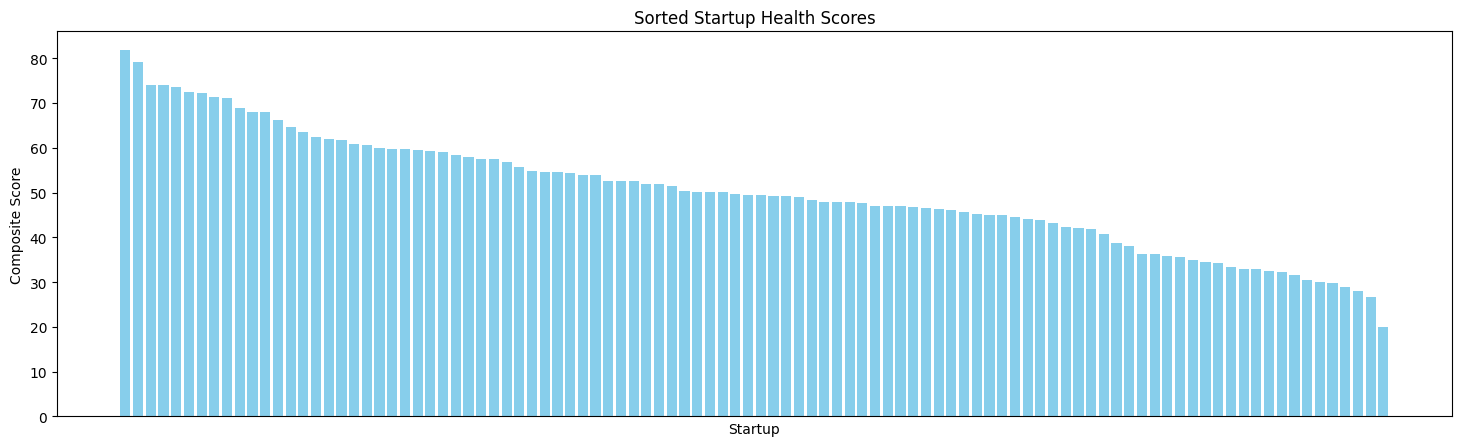

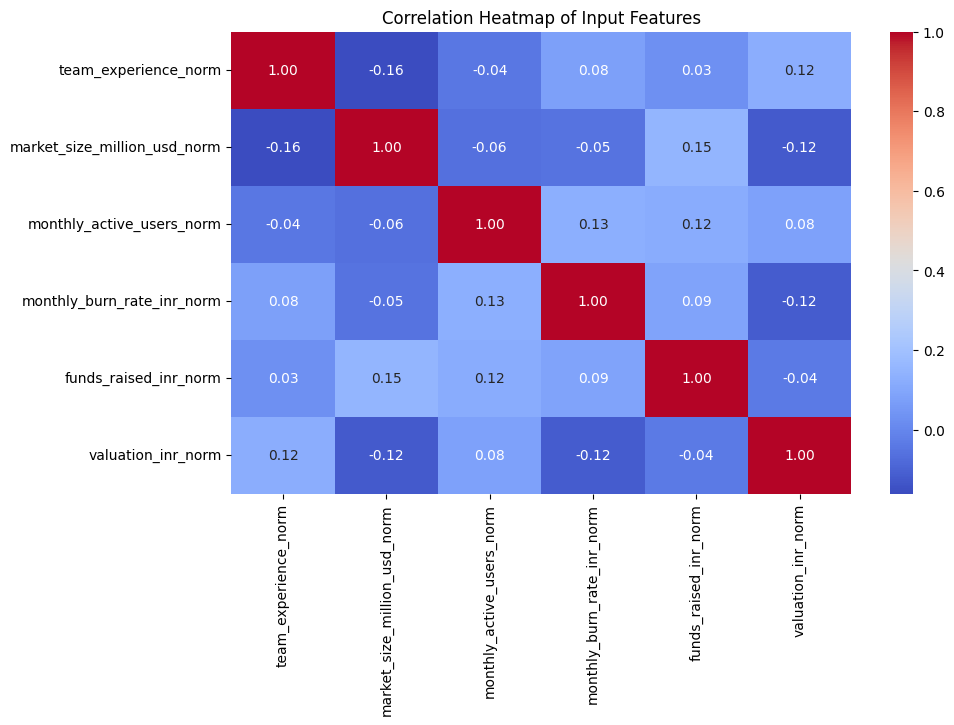

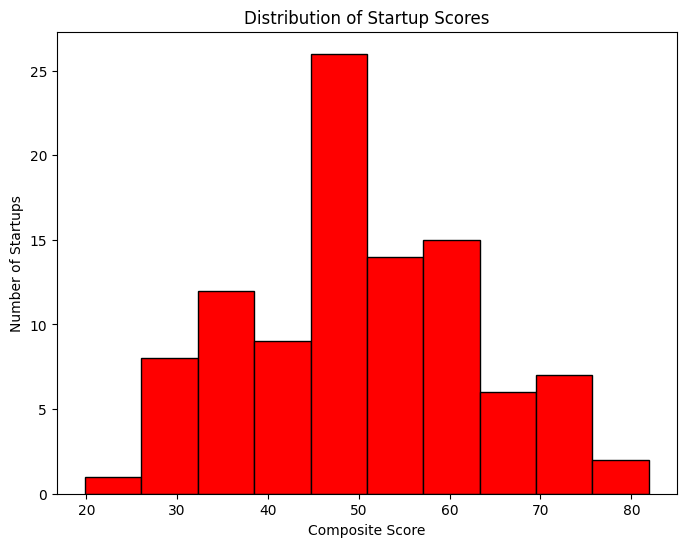

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sorted_df = norm_df.sort_values('startup_score', ascending=False)
plt.figure(figsize=(18, 5))
plt.bar(sorted_df['startup_id'], sorted_df['startup_score'], color='skyblue')
plt.xlabel('Startup')
plt.ylabel('Composite Score')
plt.title('Sorted Startup Health Scores')
plt.xticks([], [])
plt.savefig('startup score.png', dpi=300, bbox_inches='tight')
plt.show()

#corelation
feature_cols = [
    'team_experience_norm',
    'market_size_million_usd_norm',
    'monthly_active_users_norm',
    'monthly_burn_rate_inr_norm',
    'funds_raised_inr_norm',
    'valuation_inr_norm'
]
plt.figure(figsize=(10, 6))
sns.heatmap(norm_df[feature_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Input Features')
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
plt.show()

#histogram
plt.figure(figsize=(8, 6))
plt.hist(norm_df['startup_score'], bins=10, color='red', edgecolor='black')
plt.xlabel('Composite Score')
plt.ylabel('Number of Startups')
plt.title('Distribution of Startup Scores')
plt.savefig('Histogram.png', dpi=300, bbox_inches='tight')
plt.show()
